In [22]:
# 插入必要的包
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

## 收集

In [2]:
# 从twitter-archive-enhanced.csv导入为archive_df
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 从image-predictions.tsv导入image_df
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv','wb') as file:
    file.write(r.content)
image_df = pd.read_csv('image-predictions.tsv',delimiter='\t',encoding='utf-8')

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000191242A2DD8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [4]:
#从tweet_json.txt导入tweet_df
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))
tweet_df = pd.DataFrame(status)

## 评估

### 目测评估

In [5]:
#目测评估archive_df
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
a = archive_df.isnull().sum()

In [38]:
a

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [39]:
a = 100 *  a / len(archive_df)

In [40]:
a

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

(array([11.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  2.]),
 array([ 0.        ,  0.96689304,  1.93378608,  2.90067912,  3.86757216,
         4.8344652 ,  5.80135823,  6.76825127,  7.73514431,  8.70203735,
         9.66893039, 10.63582343, 11.60271647, 12.56960951, 13.53650255,
        14.50339559, 15.47028862, 16.43718166, 17.4040747 , 18.37096774,
        19.33786078, 20.30475382, 21.27164686, 22.2385399 , 23.20543294,
        24.17232598, 25.13921902, 26.10611205, 27.07300509, 28.039898

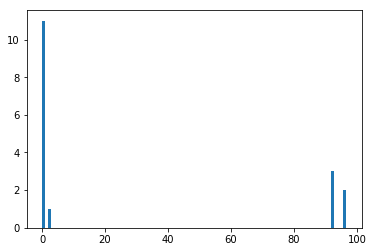

In [43]:
plt.hist(a,100)

In [416]:
#目测评估image_df
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [417]:
#目测评估tweet_df
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.co...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/medi...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.co...",25445,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Source for Professional ..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com...",42863,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WILL RATE', 'description': 'Only Legit Sou

### 编程评估

In [418]:
#检查archive_df的数据缺失、数据类型、行列个数
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [419]:
#检查archive_df的数据重复
archive_df[archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [420]:
#检查image_df的数据缺失、数据类型、行列个数
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [421]:
#检查image_df的数据重复
image_df[image_df.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [422]:
#检查tweet_df的数据缺失、数据类型、行列个数
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [423]:
#检查tweet_df的id列和id_str列的数据重复
tweet_df[['id','id_str']].head()

,id,id_str
0,892420643555336193,892420643555336193
1,892177421306343426,892177421306343426
2,891815181378084864,891815181378084864
3,891689557279858688,891689557279858688
4,891327558926688256,891327558926688256


In [424]:
#检查archive_df的rating_numerator列数据值分布
archive_df["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [425]:
#检查archive_df的rating_denominator列数据值分布
archive_df["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### 评估结果

#### 质量

##### `archive_df` 表格

- tweet_id是整型，而不是字符串型
- in_reply_to_status_id列、in_reply_to_user_id列缺失数据
- timestamp是字符串型，而不是datetime型
- 依据项目动机要求，删除timestamp列数据值在2017年8月1日之后的行
- 依据项目动机要求，删除retweeted_status_id列或retweeted_status_user_id列或retweeted_status_timestamp列为非nan的数据行
- archive_df的*rating_numerator*列值、*rating_denominator*列值分别主要集中于<14和<11。

##### `image_df` 表格

- tweet_id 是整型，而不是字符串型

##### `tweet_df` 表格

- id_str的列名与`archive_df`表格的tweet_id列名 、`image_df`表格的tweet_id列名不一致
- created_at列是字符串型，而不是datetime型
- 依据项目动机要求，删除created_at列数据值在2017年8月1日之后的行
- 依据项目动机要求，只保留tweet_id列、favorite_count列、retweet_count列

#### 清洁度

-  `archive_df` 表格四列表示一个个变量 (doggo、floofer、pupper、puppo)
-  依据项目要求，依据相同的tweet_id，将`tweet_df` 表格、`image_df`表格、`archive_df`表格合并为同一表格 

### 数据清洗

In [426]:
#清洗数据前，保存副本
archive_cl = archive_df.copy()
image_cl = image_df.copy()
tweet_cl = tweet_df.copy()

#### 质量 - archive_df

#### tweet_id是整型，而不是字符串型

##### 定义
使用pandas 的 `.astype()` 函数，把 *tweet_id* 一列数据类型转化为`str`。

##### 代码

In [427]:
#使用pandas 的 .astype() 函数，把 tweet_id 一列数据类型转化为str
archive_cl['tweet_id'] = archive_cl['tweet_id'].astype('str')

##### 测试

In [428]:
#检查结果
archive_cl.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### 质量 - archive_df

#### in_reply_to_status_id列、in_reply_to_user_id列缺失数据

##### 定义
使用pandas 的 `.drop()` 函数，删除 *in_reply_to_status_id* 列、*in_reply_to_user_id*列。

##### 代码

In [429]:
#使用pandas 的 .drop() 函数，删除 in_reply_to_status_id 列、in_reply_to_user_id列
archive_cl.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

##### 测试

In [430]:
#检查结果
archive_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 276.2+ KB


#### 质量 - archive_df

#### timestamp是字符串型，而不是datetime型

##### 定义
使用pandas 的 `to_datetime()` 函数，将 *timestamp* 列转换为`datetime`类型。

##### 代码

In [431]:
#使用pandas 的 to_datetime() 函数，将 timestamp 列转换为datetime类型
archive_cl['timestamp'] = pd.to_datetime(archive_cl['timestamp'])

#### 测试

In [432]:
#检查结果
archive_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 276.2+ KB


#### 质量 - archive_df

#### 依据项目动机要求，删除timestamp列数据值在2017年8月1日之后的行

##### 定义
使用pandas 的 `query()` 函数，删除*timestamp* 列数据值在2017年8月1日之后的行。

##### 代码

In [433]:
#使用pandas 的 query() 函数，删除timestamp 列数据值在2017年8月1日之后的行
archive_cl.query("timestamp < '2017-08-01' | timestamp == '2017-08-01'",inplace=True)

#### 测试

In [434]:
#检查结果
archive_cl.query("timestamp > '2017-08-01'")

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 质量 - archive_df

#### 依据项目动机要求，删除retweeted_status_id列或retweeted_status_user_id列或retweeted_status_timestamp列为非nan的数据行

##### 定义
使用series 的 `isnull()` 函数，保留*retweeted_status_id*列、*retweeted_status_user_id*列、*retweeted_status_timestamp*列均为nan的行。然后运用
pandas的`drop()`函数删除*retweeted_status_id*列、*retweeted_status_user_id*列、*retweeted_status_timestamp*列。
##### 代码

In [435]:
#使用series 的 isnull() 函数，保留retweeted_status_id列、retweeted_status_user_id列、retweeted_status_timestamp列均为nan的行。
archive_cl = archive_cl[archive_cl.retweeted_status_id.isnull() & archive_cl.retweeted_status_user_id.isnull() & archive_cl.retweeted_status_timestamp.isnull() ]

In [436]:
#用 pandas的drop()函数删除retweeted_status_id列、retweeted_status_user_id列、retweeted_status_timestamp列
archive_cl.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

#### 测试

In [437]:
#检查结果
archive_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 12 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2115 non-null object
rating_numerator      2173 non-null int64
rating_denominator    2173 non-null int64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.7+ KB


#### 质量 - archive_df

#### archive_df的rating_numerator列值、rating_denominator列值分别主要集中于<14和<11。

##### 定义5
pandas的赋值函数保留*rating_numerator*列值<14且*rating_denominator*列值<11的行。
##### 代码

In [438]:
#archive_df的rating_numerator列值、rating_denominator列值分别主要集中于<14和<11。
archive_cl = archive_cl[(archive_cl["rating_numerator"]<=14) & (archive_cl["rating_denominator"]<=11)]

##### 测试

In [439]:
#检查结果
archive_cl[(archive_cl["rating_numerator"]>14) & (archive_cl["rating_denominator"]>11)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 质量 -image_df

#### tweet_id是整型，而不是字符串型

##### 定义
使用pandas 的 `.astype()` 函数，把 *tweet_id* 一列数据类型转化为`str`。

##### 代码

In [440]:
# 使用pandas 的 .astype() 函数，把 tweet_id 一列数据类型转化为str
image_cl['tweet_id'] = image_cl['tweet_id'].astype('str')

##### 测试

In [441]:
# 检查结果
image_cl.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### 质量 - tweet_df

#### id_str的列名与archive_df表格的tweet_id列名 、image_df表格的tweet_id列名不一致

##### 定义
使用pandas 的 `.rename()` 函数，把 *id_str*的列名改为为`tweet_id`。

##### 代码

In [442]:
# 使用pandas 的 .rename() 函数，把 id_str的列名改为为tweet_id
tweet_cl.rename(columns = {'id_str':'tweet_id'},inplace=True)

#### 测试

In [443]:
# 检查结果
tweet_cl.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'tweet_id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

#### 质量 - tweet_df

#### created_at列是字符串型，而不是datetime型

##### 定义
使用pandas 的 to_datetime() 函数，将created_at列转换为datetime类型

##### 代码

In [444]:
# 使用pandas 的 to_datetime() 函数，将created_at列转换为datetime类型
tweet_cl['created_at'] = pd.to_datetime(tweet_cl['created_at'])

#### 测试

In [445]:
# 检查结果
tweet_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
tweet_id                         2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-

#### 质量 - tweet_df

#### 依据项目动机要求，删除created_at列数据值在2017年8月1日之后的行

##### 定义
使用pandas 的 `query()` 函数，删除*created_at* 列数据值在2017年8月1日之后的行。

##### 代码

In [446]:
# 用pandas 的 query() 函数，删除created_at 列数据值在2017年8月1日之后的行
tweet_cl.query("created_at < '2017-08-01' | created_at == '2017-08-01'",inplace=True)

#### 测试

In [447]:
# 检查结果
tweet_cl.query("created_at > '2017-08-01'")

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


#### 质量 - tweet_df

#### 依据项目动机要求，只保留tweet_id列、favorite_count列、retweet_count列

##### 定义
选择tweet_id列、favorite_count列、retweet_count列并重新赋值给tweet_df。

##### 代码

In [448]:
# 选择tweet_id列、favorite_count列、retweet_count列并重新赋值给tweet_df
tweet_cl = tweet_cl[['tweet_id','favorite_count','retweet_count']]

#### 测试

In [449]:
# 检查结果
tweet_cl.head()

,tweet_id,favorite_count,retweet_count
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142


#### 清洁度 - archive_df

#### archive_df 表格四列表示一个stage变量 (doggo、floofer、pupper、puppo)

##### 定义
利用`.replace()`函数将doggo、floofer、pupper、puppo各列的`None`替代为`0`，利用`+`运算符合并各列为1列,并命名为`stage`,利用`str.extract()`函数利用正则表达式捕获任意非数字的字符，利用`.fillna()`函数将`Nan`替换`None`,删除doggo、floofer、pupper、puppo各列。

##### 代码

In [450]:
# 利用.replace()函数将doggo、floofer、pupper、puppo各列的None替代为""
stage_list = ['doggo','floofer','pupper','puppo']
for item in stage_list:
    archive_cl[item].replace({'None':''},inplace=True)

In [451]:
# 利用+运算符合并各列为1列,并命名为stage
archive_cl['stage'] = archive_cl['doggo']+ archive_cl['floofer']+archive_cl['pupper']+ archive_cl['puppo']

In [452]:
#检查替换后结果
archive_cl['stage'].value_counts()

                1801
pupper           223
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [453]:
# str.extract()函数利用正则表达式捕获任意非数字的字符
archive_cl['stage'] = archive_cl['stage'].str.extract('(\D+)')

In [454]:
# 将上述替换后的stage列值修改为便于理解与可视化
archive_cl.loc[archive_cl['stage']=='doggofloofer','stage']='doggo|floofer'
archive_cl.loc[archive_cl['stage']=='doggopupper','stage']='doggo|pupper'
archive_cl.loc[archive_cl['stage']=='doggopuppo','stage']='doggo|puppo'

In [455]:
#检查替代结果
archive_cl['stage'].value_counts()

pupper           223
doggo             75
puppo             24
doggo|pupper      10
floofer            9
doggo|puppo        1
doggo|floofer      1
Name: stage, dtype: int64

In [456]:
# 用.fillna()函数将Nan替换None
archive_cl['stage'].fillna('None',inplace = True) 

In [457]:
# 删除doggo、floofer、pupper、puppo各列
archive_cl.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### 测试

In [458]:
# 检查结果
archive_cl['stage'].sample(5)

1491    None
1090    None
1054    None
2       None
20      None
Name: stage, dtype: object

In [459]:
# 检查结果
archive_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 2 to 2355
Data columns (total 9 columns):
tweet_id              2144 non-null object
timestamp             2144 non-null datetime64[ns]
source                2144 non-null object
text                  2144 non-null object
expanded_urls         2095 non-null object
rating_numerator      2144 non-null int64
rating_denominator    2144 non-null int64
name                  2144 non-null object
stage                 2144 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 167.5+ KB


 #### 清洁度 - archive_df

#### 依据项目要求，依据相同的tweet_id，将`tweet_df` 表格、`image_df`表格、`archive_df`表格合并为同一表格 

##### 定义
先利用`.merge()`函数，依据`tweet_id`将*archive_cl*、*tweet_cl*合并为`dog_cl`,之后利用`.merge()`函数，依据`tweet_id`将*dog_cl*、*image_cl*合并。
##### 代码

In [460]:
# 用.merge()函数，依据tweet_id将archive_cl、tweet_cl合并为dog_cl
dog_cl = pd.merge(archive_cl,tweet_cl,on='tweet_id',how='left')
# 用.merge()函数，依据tweet_id将dog_cl、image_cl合并
dog_cl = pd.merge(dog_cl,image_cl,on='tweet_id',how='inner')

#### 测试

In [461]:
# 检查结果
dog_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 22 columns):
tweet_id              1972 non-null object
timestamp             1972 non-null datetime64[ns]
source                1972 non-null object
text                  1972 non-null object
expanded_urls         1972 non-null object
rating_numerator      1972 non-null int64
rating_denominator    1972 non-null int64
name                  1972 non-null object
stage                 1972 non-null object
favorite_count        1972 non-null int64
retweet_count         1972 non-null int64
jpg_url               1972 non-null object
img_num               1972 non-null int64
p1                    1972 non-null object
p1_conf               1972 non-null float64
p1_dog                1972 non-null bool
p2                    1972 non-null object
p2_conf               1972 non-null float64
p2_dog                1972 non-null bool
p3                    1972 non-null object
p3_conf               1972 non-n

In [462]:
#将清理后的数据集存储到 CSV 文件中，命名为 twitter_archive_master.csv
dog_cl.to_csv('twitter_archive_master.csv',index=False)

## 探索数据

### 问题
- 1 喜欢数和转发数和最高的前5种狗的品种? 
- 2 评分数和最高的前5种狗的品种?
- 3 狗的地位中喜欢数和转发数和的排序?

### 数据整理

In [463]:
# 为dog_cl创建count列为favorite_count列和retweet_count列之和
dog_cl['count'] = dog_cl['favorite_count'] + dog_cl['retweet_count']
# 为dog_cl创建rating列为rating_numerator列和rating_denominator列之比
dog_cl['rating'] = dog_cl['rating_numerator'] / dog_cl['rating_denominator']
# 保留"rating"列,"stage"列,"count"列,"p1"列,"p1_conf"列,"p1_dog"列，并创建dog_val
dog_val = dog_cl[["rating","stage","count","p1","p1_conf","p1_dog"]] 

In [464]:
#检查结果
dog_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 6 columns):
rating     1972 non-null float64
stage      1972 non-null object
count      1972 non-null int64
p1         1972 non-null object
p1_conf    1972 non-null float64
p1_dog     1972 non-null bool
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 94.4+ KB


### 数据可视化

In [465]:
#导入可视化工具包
import matplotlib.pyplot as plt
%matplotlib inline

#### 问题 1
1)喜欢数和转发数和最高的前5种狗的品种? 

count    5.000000e+00
mean     1.303086e+06
std      5.847181e+05
min      7.252420e+05
25%      8.532420e+05
50%      1.270737e+06
75%      1.466747e+06
max      2.199460e+06
Name: count, dtype: float64


Text(0.5, 1.0, 'Popular dog count number')

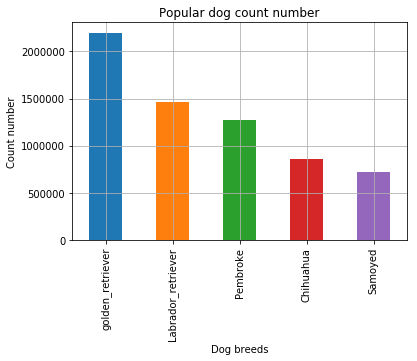

In [466]:
# 打印统计结果
print(dog_val.groupby(['p1']).sum()['count'].sort_values(ascending=False)[0:5].describe())
# 可视化结果
dog_val.groupby(['p1']).sum()['count'].sort_values(ascending=False)[0:5].plot(kind='bar',grid=True)
# 设置可视化图标签及标题
plt.xlabel('Dog breeds')
plt.ylabel('Count number')
plt.title('Popular dog count number')

#### 结论 1：
喜欢数和转发数和最高的前5种狗的品种从⾼到低依次为golden_retriever、Labrador_retriever、Pembroke、Chihuahua、Samoyed。

#### 问题 2
2)评分数和最高的前5种狗的品种? 

count      5.000000
mean      99.723636
std       37.156855
min       55.300000
25%       83.300000
50%      100.700000
75%      102.400000
max      156.918182
Name: rating, dtype: float64


Text(0.5, 1.0, 'Popular dog rating sum')

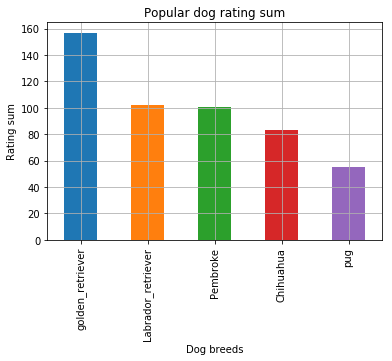

In [467]:
# 打印统计结果
print(dog_val.groupby(['p1']).sum()['rating'].sort_values(ascending=False)[0:5].describe())
# 可视化结果
dog_val.groupby(['p1']).sum()['rating'].sort_values(ascending=False)[0:5].plot(kind='bar',grid=True)
# 设置可视化图标签及标题
plt.xlabel('Dog breeds')
plt.ylabel('Rating sum')
plt.title('Popular dog rating sum')

#### 结论 2：
评分数和最高的前5种狗的品种从⾼到低依次为golden_retriever、Labrador_retriever、Pembroke、Chihuahua、Pug。

#### 问题 3
3)狗的地位中喜欢数和转发数和的排序? 

count    8.000000e+00
mean     2.882755e+06
std      6.353587e+06
min      2.053900e+04
25%      1.116815e+05
50%      3.818035e+05
75%      1.727383e+06
max      1.849787e+07
Name: count, dtype: float64


Text(0.5, 1.0, 'Dog stage count number')

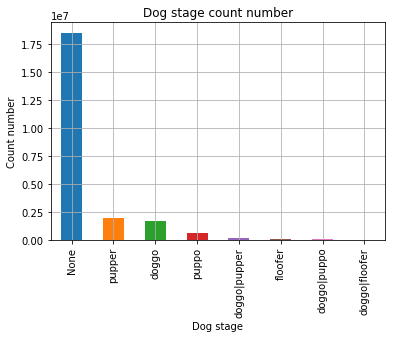

In [468]:
# 打印统计结果
print(dog_val.groupby(['stage']).sum()['count'].sort_values(ascending=False)[0:8].describe())
# 可视化结果
dog_val.groupby(['stage']).sum()['count'].sort_values(ascending=False)[0:8].plot(kind='bar',grid=True)
# 设置可视化图标签及标题
plt.xlabel('Dog stage')
plt.ylabel('Count number')
plt.title('Dog stage count number')

#### 结论 3：
除去未标明狗的地位，标明狗地位中喜欢数和转发数和从⾼到低依次为pupper、doggo、puppo、doggo|pupper、floofer、doggo|puppo、doggo|floofer。